# 07-05-Hard-Robot-2DOF-01A

In [1]:
resultimage='../../Results/Chapter 07/07-05-Hard-Robot-2DOF-01-02.jpg'
resultdata='../../Results/Chapter 07/07-05-Hard-Robot-2DOF-01-02.csv'

In [2]:
%matplotlib inline

In [3]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
armAngleRangeMin= -10
armAngleRangeMax=  10
armLiftRangeMin= -45
armLiftRangeMax=  45
l=500
s1=2
s2=2

t=0


for Q2d in range(armLiftRangeMin,armLiftRangeMax+1,s1):
    Q2r = np.radians(Q2d)
    z=l*np.sin(Q2r)
    p=l*np.cos(Q2r)
    
    for Q1d in range(armAngleRangeMin,armAngleRangeMax+1,s2):
        Q1r = np.radians(Q1d)
        x=p*np.sin(Q1r)
        y=p*np.cos(Q1r)
        #print('Angle Disk: %+9.3f Angle Lift: %+9.3f Arm length= %+5.3f x= %+5.3f y= %+5.3f z= %+5.3f' % (Q1d,Q2d,l,x,y,z))
        
        t+=1
        if t==1:
            xp=pd.DataFrame([x])
            yp=pd.DataFrame([y])
            zp=pd.DataFrame([z])
        else:
            xp=xp.append([x])
            yp=yp.append([y])
            zp=zp.append([z])

In [5]:
x=xp[0]
y=yp[0]
z=zp[0]
frames = [x, y, z]
dp=pd.concat(frames, axis=1)
dp.columns = ['X','Y','Z']
print(dp.shape)

(506, 3)


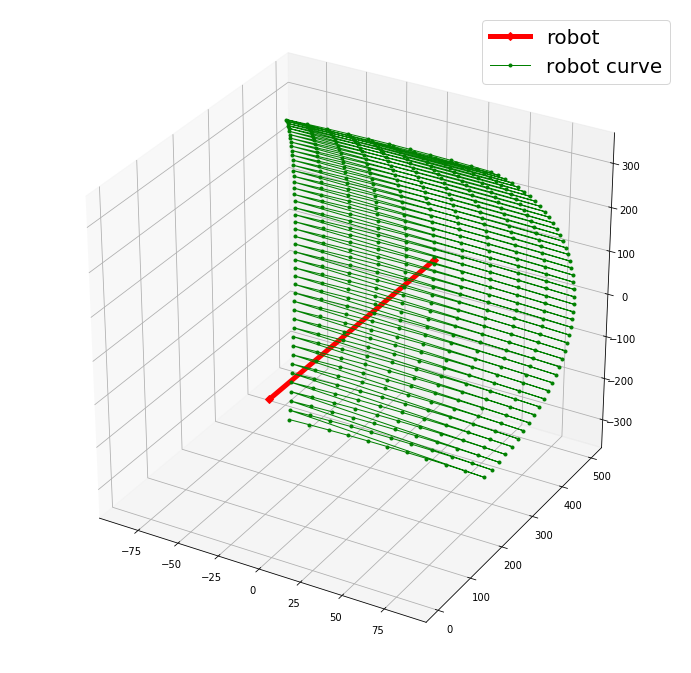

In [6]:
mpl.rcParams['legend.fontsize'] = 20

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.plot(xs=[0,0], ys=[0,l], zs=[0,0], label='robot', marker='D', color='red', linewidth=5)
ax.plot(xs=x, ys=y, zs=z, label='robot curve', marker='.', color='green',linewidth=1)
ax.legend()
plt.show()

In [7]:
fig.savefig(resultimage)

In [8]:
dp.to_csv(resultdata, index=False)